<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
    Andrés Ramírez Villanueva

**Fecha:** 22 de junio del 2021.

**Expediente** : IF726061
    
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/andres1999iteso/Tarea-5_ARamirez_V

# Tarea 5: Clase 9

> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


In [123]:
# Importar librerías
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Problema 1

Procedimiento aritmético que se llevó a cabo:

>$$F(x)=U$$ </font>
$$ U = \frac{2}{\pi}\sin^{-1}(\sqrt{x}) $$
$$ \frac{U\pi}{2} = \sin^{-1}(\sqrt{x}) $$
$$ \sin(\frac{U\pi}{2}) = \sqrt{x} $$
$$ x = \sin(\frac{U\pi}{2})^2 $$
$$ f(x) = \frac{1}{\pi \sqrt{x}\sqrt{1-x}} $$

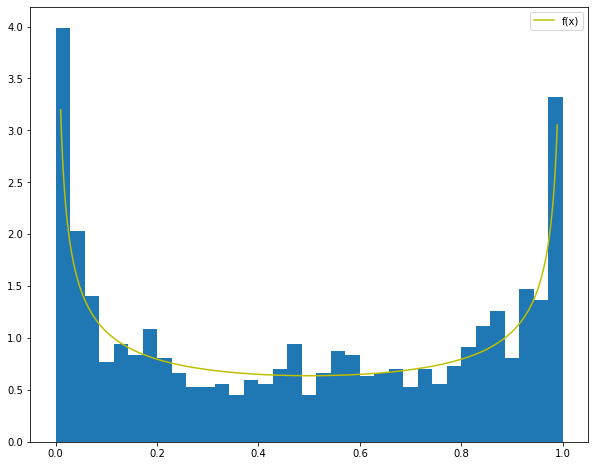

In [124]:
muestras = np.random.rand(1000)

funcion = np.sin(np.pi/2 * muestras)**2

x = np.arange(0.01,0.99,0.001)

f_x = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))

#graficar
plt.figure(figsize=(10,8))
plt.plot(x, f_x, color = 'y', label = 'f(x)')
plt.hist(funcion, 35, density = True,)
plt.legend()
plt.show()

# Problema 2

In [131]:
def distribucion_binomial(n: 'Rango de números', p: 'Probabilidad'):
    vec = np.zeros(n)
    for i in range(n):
        vec[i] = np.math.factorial(n)/(np.math.factorial(i+1)*np.math.factorial(n-i-1))*p**(i+1)*(1-p)**(n-i-1)
    return vec

def generador_vad(proba_acum: 'Probabilidad acumulada', indices: 'Valores por generar', N: 'Aleatorios por generar'):
    
    diccionario = {i: idx for i, idx in enumerate(indices)}
    U = np.random.rand(N)
    y = pd.Series([sum([1 for p in proba_acum if p < ui]) for ui in U]).map(diccionario)
    return y

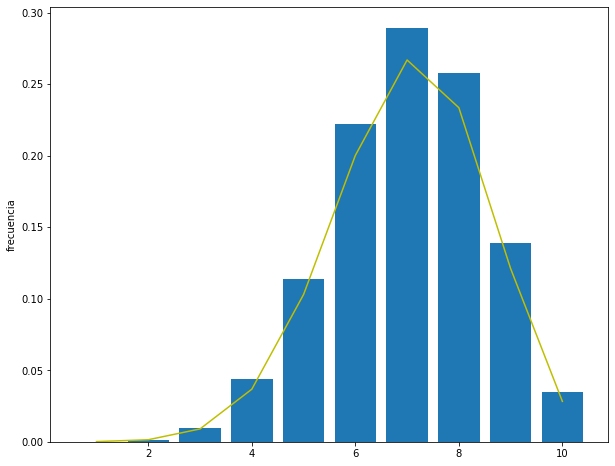

In [137]:
n = 10
N = 10000
p = 0.7

f = distribucion_binomial(n, p)
f_acum = f.cumsum()
arreglo = np.arange(1, n+1)
o = generador_vad(f_acum, arreglo, N)

y, x = np.histogram(o, bins = len(set(arreglo)), density=True)
plt.figure(figsize=(10,8))
plt.bar(arreglo, y)
plt.plot(arreglo, f, c = 'y')
plt.ylabel('frecuencia')
plt.show()